In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Who were the passengers on the Titanic? (Age, Gender, Class,..etc)

<AxesSubplot:xlabel='Sex', ylabel='count'>

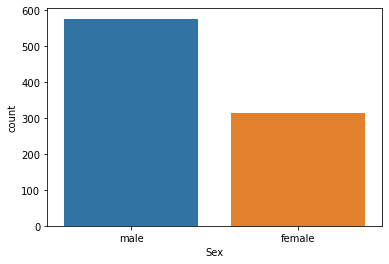

In [5]:
sns.countplot(data=titanic_df, x='Sex')

# sns.countplot(data = titanic_df, x = 'Sex', y='PassengerId', hue="Series")

<AxesSubplot:xlabel='Sex', ylabel='count'>

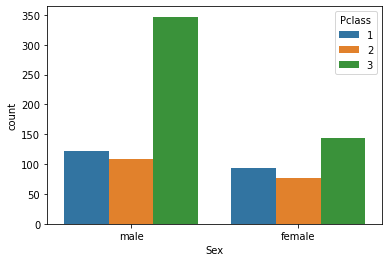

In [6]:
sns.countplot(data=titanic_df, x='Sex',hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

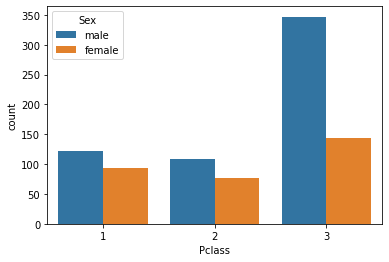

In [7]:
sns.countplot(data=titanic_df, x='Pclass', hue='Sex')

In [8]:
def male_female_child(passenger):
    age, sex = passenger
    if(age<16):
        return 'child'
    else:
        return sex

In [9]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [10]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<AxesSubplot:xlabel='Pclass', ylabel='count'>

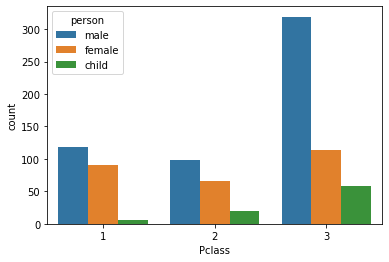

In [11]:
sns.countplot(data=titanic_df, x='Pclass',hue='person')

<AxesSubplot:>

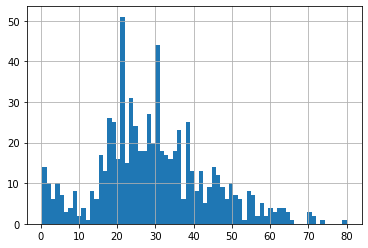

In [12]:
titanic_df['Age'].hist(bins=70)  # Creating histogram 

In [13]:
titanic_df['Age'].mean()

29.69911764705882

In [14]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

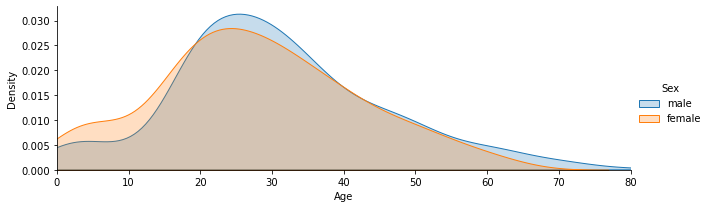

In [15]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=3)  # FasetGrid=>multiple plot in one figure

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

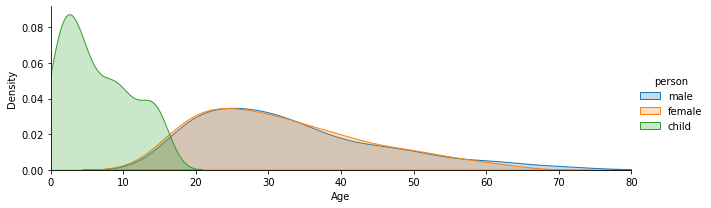

In [16]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=3)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

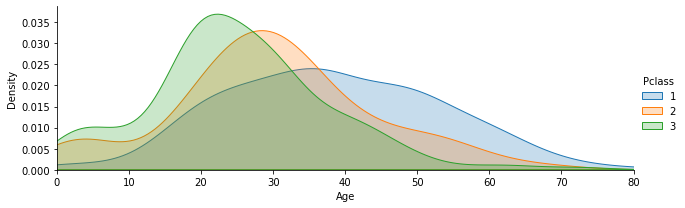

In [17]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=3)

fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0, oldest))

fig.add_legend()

#  What deck were the passengers on and how does that relate to their class?

In [18]:
titanic_df.head()  # head() => it's print only 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [19]:
deck = titanic_df['Cabin'].dropna()

deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [20]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


<AxesSubplot:xlabel='Cabin', ylabel='count'>

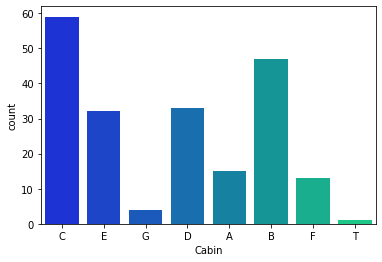

In [21]:
sns.countplot(data=cabin_df, x='Cabin',palette='winter')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

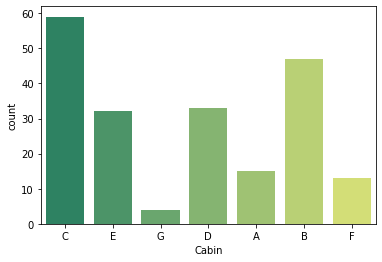

In [22]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot(data = cabin_df, x='Cabin', palette='summer')

# Where did the passengers come from?

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<AxesSubplot:xlabel='Embarked', ylabel='count'>

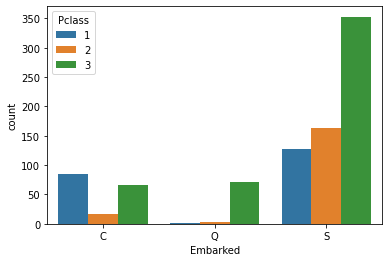

In [24]:
sns.countplot(data=titanic_df, x='Embarked',hue='Pclass',  order=['C','Q','S'])

# Who was alone and who was with family?

In [25]:
titanic_df.head()  # SibSp=> sibling, Parch=0=>neither parent nor children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [26]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [27]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'with Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'alone'

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27920\740564019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'with Family'


In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

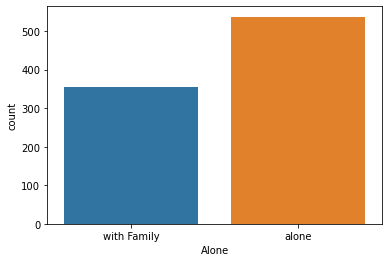

In [29]:
sns.countplot(data = titanic_df, x='Alone')

<AxesSubplot:xlabel='Servivor', ylabel='count'>

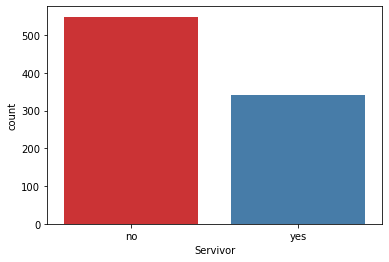

In [30]:
titanic_df['Servivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

sns.countplot(data=titanic_df, x='Servivor',palette='Set1')

# What factors helped someone survive the sinking???

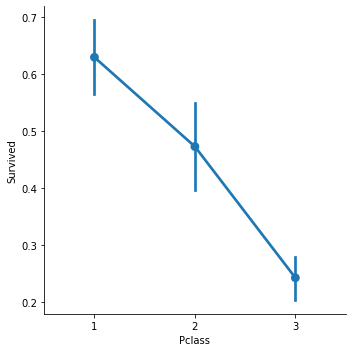

In [31]:
sns.catplot(x='Pclass', y='Survived', data=titanic_df, kind="point")

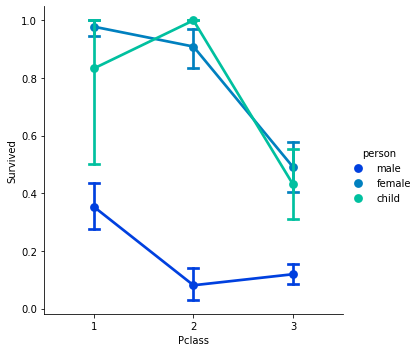

In [37]:
# sns.factorplot(x='Pclass', y='Survived', data=titanic_df, hue='person')

sns.catplot(
    data=titanic_df, x='Pclass', y='Survived', hue='person',
    capsize=.1, palette='winter', 
    kind='point')

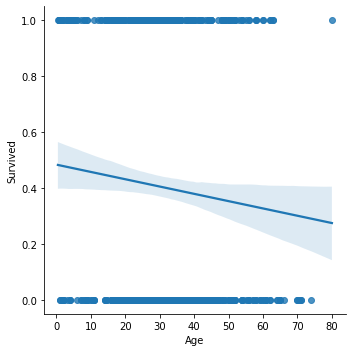

In [33]:
sns.lmplot(x='Age', y='Survived', data=titanic_df)

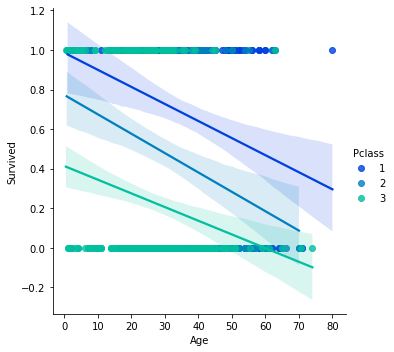

In [34]:
sns.lmplot(x='Age', y='Survived', data=titanic_df,
           hue='Pclass', palette='winter')

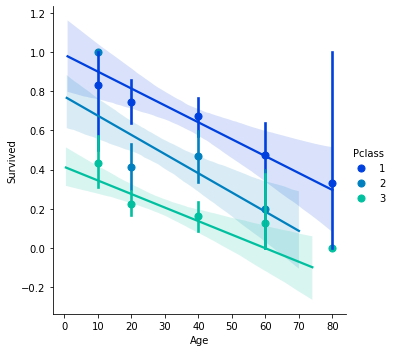

In [35]:
generations = [10, 20, 40, 60, 80]

sns.lmplot(x='Age', y='Survived', data=titanic_df, hue='Pclass',
           palette='winter', x_bins=generations)

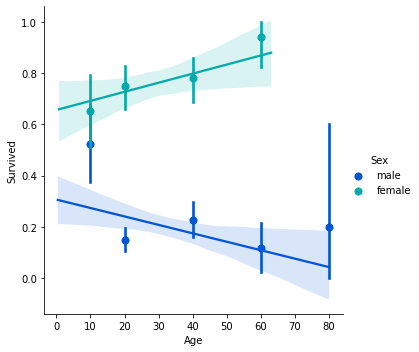

In [36]:
sns.lmplot(x='Age', y='Survived', hue='Sex', data=titanic_df,
          palette='winter', x_bins=generations)